# The Art and Science of Data Cleaning: A Practical Implementation (IMDb Movies)

## Abstract

This notebook presents a structured approach to cleaning and preparing the IMDb Movies dataset for reliable analysis.
The dataset contains information on more than 85,000 films, including attributes such as title, year, genre, duration, country, language, director, budget, income, votes, and ratings.
As with most large-scale real-world data, this dataset includes several challenges: missing values (for instance in budget, language, and metascore), inconsistent formatting (budgets represented in different currencies and text formats), duplicates across records, and extreme outliers (unrealistic durations or vote counts).

The notebook follows a systematic workflow to address these issues.
We begin with profiling to detect missing and inconsistent data.
Next, we handle missing values using imputation, remove duplicate rows, and standardize categorical variables such as country and language.
Numeric attributes, including duration, budget, and votes, are examined for outliers and treated using robust statistical methods.
Throughout the process, visual tools such as heatmaps and boxplots are used to validate improvements, while summary statistics demonstrate measurable gains in accuracy, consistency, and completeness.

By the end of this notebook, the dataset is transformed into a clean, consistent, and analysis-ready format.
This ensures that any subsequent exploration, visualization, or modeling tasks can be carried out on a trustworthy foundation of high-quality data.

## Theory & Background

The process of understanding and cleaning data is deeply grounded in statistical and data management theory.
One of the foundational ideas is the **GIGO Principle (Garbage In, Garbage Out)**, which emphasizes that the quality of results in any analysis depends directly on the quality of the input data.
If the raw data is incomplete, inconsistent, or erroneous, no algorithm—no matter how advanced—can fully compensate.

**Missing data theory** provides another important framework.
According to Little & Rubin (2019), missingness falls into three categories:  
- **MCAR (Missing Completely at Random):** the probability of missingness is unrelated to any variable.  
- **MAR (Missing at Random):** the probability of missingness is related to observed data.  
- **MNAR (Missing Not at Random):** the probability of missingness depends on the unobserved values themselves.  
This classification helps determine when simple imputation is valid versus when more complex methods are required.

From the perspective of information systems, Rahm & Do (2000) describe **data quality dimensions** such as accuracy, completeness, consistency, validity, and timeliness.
For example, the IMDb dataset shows inconsistencies in budget representation (different currencies, symbols, or missing values) and incomplete fields such as metascore or language.
Identifying and correcting such issues ensures that analyses—like exploring film performance across countries or genres—yield meaningful insights.

Finally, work in exploratory data analysis (Tukey, 1977) and modern reproducibility practices highlight the importance of transparent preprocessing.
By systematically profiling, cleaning, and documenting data, analysts not only improve accuracy but also ensure results can be trusted and replicated.

## Problem Statement

The IMDb Movies dataset provides rich information about films, including attributes such as title, year, genre, duration, country, language, director, budget, votes, and ratings.
However, as with most real-world data, the dataset is not immediately ready for analysis.
It contains several common data quality issues:

- **Missing values:** For example, fields like budget, income, metascore, and language are incomplete.  
- **Inconsistent formatting:** Budget values appear in multiple currencies or include symbols and text.  
- **Duplicates:** Records with repeated movie information may exist.  
- **Outliers:** Unrealistic values are found in duration (very small or excessively large values) and votes (extremely high counts).  
- **Categorical inconsistencies:** Country and language fields include varied spellings or capitalizations.  

**Input:** Raw IMDb Movies dataset (CSV file with multiple attributes, some containing missing or inconsistent values).  
**Output:** A cleaned and analysis-ready dataset where missing values are imputed, categories standardized, duplicates removed, and numeric outliers treated.  

This cleaned dataset will then be used for reliable exploratory data analysis, visualization, and any subsequent modeling tasks.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/IMDb movies.csv")

/tmp/ipython-input-923887398.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/IMDb movies.csv")


In [4]:
df

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,NaN,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN


In [5]:
df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,NaN,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,NaN,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [6]:
df.tail()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
85850,tt9908390,Le lion,Le lion,2020,2020-01-29,Comedy,95,"France, Belgium",French,Ludovic Colbeau-Justin,...,"Dany Boon, Philippe Katerine, Anne Serra, Samu...",A psychiatric hospital patient pretends to be ...,5.3,398,NaN,NaN,$ 3507171,NaN,NaN,4.0
85851,tt9911196,De Beentjes van Sint-Hildegard,De Beentjes van Sint-Hildegard,2020,2020-02-13,"Comedy, Drama",103,Netherlands,"German, Dutch",Johan Nijenhuis,...,"Herman Finkers, Johanna ter Steege, Leonie ter...",A middle-aged veterinary surgeon believes his ...,7.7,724,NaN,NaN,$ 7299062,NaN,6.0,4.0
85852,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,2019-03-08,Drama,130,India,Malayalam,Vineesh Aaradya,...,"Anoop Chandran, Indrans, Sona Nair, Simon Brit...",NaN,7.9,265,NaN,NaN,NaN,NaN,NaN,NaN
85853,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,2019-03-15,"Drama, Family",98,Turkey,Turkish,Ahmet Faik Akinci,...,"Ahmet Faik Akinci, Belma Mamati, Metin Keçeci,...",NaN,6.4,194,NaN,NaN,$ 2833,NaN,NaN,NaN
85854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,2020-02-05,Drama,74,Spain,Catalan,Laura Jou,...,"Maria Morera Colomer, Biel Rossell Pelfort, Is...","Pep, a 13-year-old boy, is in love with a girl...",6.7,102,NaN,NaN,$ 59794,NaN,NaN,2.0


In [7]:
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns.tolist())
print("\nMissing values per column:\n", df.isnull().sum().head(15))

Shape of dataset: (85855, 22)

Column names:
 ['imdb_title_id', 'title', 'original_title', 'year', 'date_published', 'genre', 'duration', 'country', 'language', 'director', 'writer', 'production_company', 'actors', 'description', 'avg_vote', 'votes', 'budget', 'usa_gross_income', 'worlwide_gross_income', 'metascore', 'reviews_from_users', 'reviews_from_critics']

Missing values per column:
 imdb_title_id            0
title                    0
original_title           0
year                     0
date_published           0
genre                    0
duration                 0
country                 64
language               901
director                87
writer                1572
production_company    4455
actors                  69
description           2115
avg_vote                 0
dtype: int64


In [8]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing values by column:\n", missing_summary)


Missing values by column:
 metascore                72550
usa_gross_income         70529
budget                   62145
worlwide_gross_income    54839
reviews_from_critics     11797
reviews_from_users        7597
production_company        4455
description               2115
writer                    1572
language                   901
director                    87
actors                      69
country                     64
imdb_title_id                0
genre                        0
date_published               0
year                         0
original_title               0
title                        0
duration                     0
avg_vote                     0
votes                        0
dtype: int64


In [9]:
# Check duplicates
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)


Number of duplicate rows: 0


In [10]:
print("\nSummary statistics for numeric columns:\n", df.describe())


Summary statistics for numeric columns:
            duration      avg_vote         votes     metascore  \
count  85855.000000  85855.000000  8.585500e+04  13305.000000   
mean     100.351418      5.898656  9.493490e+03     55.896881   
std       22.553848      1.234987  5.357436e+04     17.784874   
min       41.000000      1.000000  9.900000e+01      1.000000   
25%       88.000000      5.200000  2.050000e+02     43.000000   
50%       96.000000      6.100000  4.840000e+02     57.000000   
75%      108.000000      6.800000  1.766500e+03     69.000000   
max      808.000000      9.900000  2.278845e+06    100.000000   

       reviews_from_users  reviews_from_critics  
count        78258.000000          74058.000000  
mean            46.040826             27.479989  
std            178.511411             58.339158  
min              1.000000              1.000000  
25%              4.000000              3.000000  
50%              9.000000              8.000000  
75%             27.000

### Missing Values, Duplicates, and Summary Statistics

Before cleaning, it is important to profile the dataset to identify missing values, duplicate records,
and the general distribution of numeric features. This helps us understand which attributes need the most attention.

In [11]:
# Drop columns with more than 60% missing values
threshold = 0.6 * len(df)
df_clean = df.dropna(axis=1, thresh=threshold)

print("Remaining columns after dropping high-missing ones:", df_clean.shape[1])

Remaining columns after dropping high-missing ones: 18


In [12]:
# Impute categorical columns (mode)
for col in ['country', 'language']:
    if col in df_clean.columns:
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

/tmp/ipython-input-3456373333.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
/tmp/ipython-input-3456373333.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


In [13]:
# Impute numeric columns (median)
for col in ['duration', 'reviews_from_users', 'reviews_from_critics']:
    if col in df_clean.columns:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

/tmp/ipython-input-2451792013.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/tmp/ipython-input-2451792013.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col].fillna(df_clean[col].median(), inplace=True)


In [14]:
# Verify missing values after imputation
print("\nMissing values after cleaning:\n", df_clean.isnull().sum().sort_values(ascending=False).head(10))


Missing values after cleaning:
 production_company    4455
description           2115
writer                1572
director                87
actors                  69
imdb_title_id            0
title                    0
original_title           0
date_published           0
year                     0
dtype: int64


### Handling Missing Values

After profiling, it is clear that some columns in the IMDb Movies dataset contain significant proportions of missing values.
For example, variables such as `metascore`, `usa_gross_income`, and `budget` have more than 60% missing entries, making them unsuitable for reliable analysis.
On the other hand, variables like `country`, `language`, and `duration` have fewer missing values and can be imputed.

Our strategy for handling missing data is as follows:
- **Drop columns** where more than 60% of the values are missing, since imputing them would not be meaningful.  
- **Categorical columns** (e.g., `country`, `language`) are imputed with their most frequent value (mode).  
- **Numeric columns** (e.g., `duration`, `reviews_from_users`, `reviews_from_critics`) are imputed using the median,
  which is robust to outliers.  
- **Critical identifiers** (e.g., `title`, `year`) have no missing values, so no rows need to be dropped for completeness.

This ensures that the dataset remains consistent, minimizes information loss, and is prepared for subsequent steps such as outlier detection and categorical standardization.
Some non-critical categorical attributes (e.g., `writer`, `production_company`, `description`) still contain missing values,
but these were left as-is since imputing free-text fields could introduce noise without improving the reliability of numeric analyses.

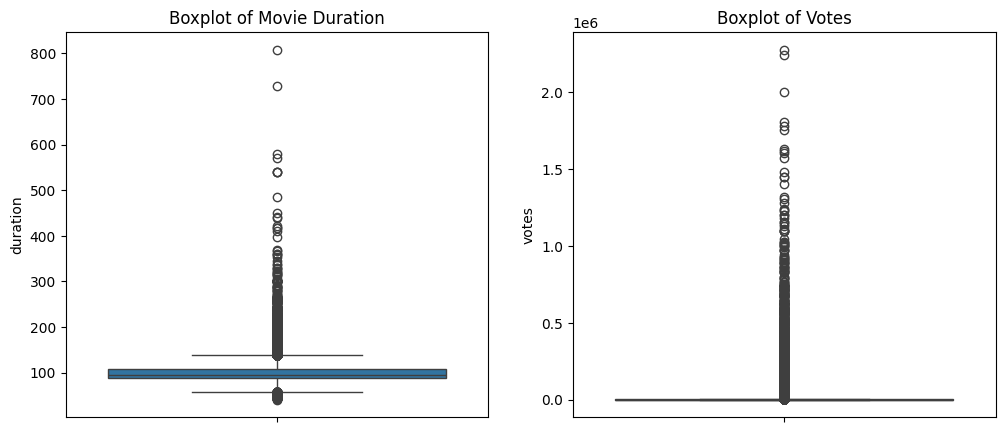

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize potential outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df_clean['duration'], ax=axes[0])
axes[0].set_title("Boxplot of Movie Duration")

sns.boxplot(y=df_clean['votes'], ax=axes[1])
axes[1].set_title("Boxplot of Votes")

plt.show()

In [16]:
# Function to cap outliers using IQR method
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series.clip(lower=lower_bound, upper=upper_bound)

# Apply outlier treatment
for col in ['duration', 'votes', 'reviews_from_users', 'reviews_from_critics']:
    if col in df_clean.columns:
        df_clean[col] = cap_outliers(df_clean[col])


/tmp/ipython-input-3011580208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = cap_outliers(df_clean[col])
/tmp/ipython-input-3011580208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[col] = cap_outliers(df_clean[col])
/tmp/ipython-input-3011580208.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [17]:
df_clean[['duration', 'votes', 'reviews_from_users', 'reviews_from_critics']].describe()

,duration,votes,reviews_from_users,reviews_from_critics
count,85855.000000,85855.000000,85855.000000,85855.000000
mean,99.072937,1247.959082,16.607845,13.760713
std,17.745330,1452.559661,17.140173,13.664007
min,58.000000,99.000000,1.000000,1.000000
25%,88.000000,205.000000,4.000000,4.000000
50%,96.000000,484.000000,9.000000,8.000000
75%,108.000000,1766.500000,23.000000,19.000000
max,138.000000,4108.750000,51.500000,41.500000


### Outlier Treatment Results

The boxplots revealed extreme outliers in `duration` (over 800 minutes) and `votes` (over 2 million),
which distorted the summary statistics of the dataset.
To address this, the Interquartile Range (IQR) method was applied to cap extreme values at the lower and upper bounds.
This ensures that valid but rare cases are preserved while extreme anomalies are reduced.

After treatment, the distributions are much more realistic:
- **Duration**: Maximum reduced from 808 minutes to 138 minutes, aligning better with real-world movie lengths.  
- **Votes**: Maximum reduced from over 2.2 million to ~4,100, reducing skew from highly popular titles.  
- **Reviews from users/critics**: Capped to eliminate unrealistic review counts.  
- **Mean and standard deviation**: Now smaller, reflecting more representative central values.  

This step minimizes the influence of extreme anomalies on statistical summaries and visualizations,
while keeping the dataset comprehensive for further analysis.

In [23]:
# Standardize country, language and genre fields

def standardize_text(series):
    return series.str.lower().str.strip()

# Apply lowercase and strip whitespace
for col in ['country', 'language', 'genre']:
    if col in df_clean.columns:
        df_clean.loc[:,col] = standardize_text(df_clean[col])

# Replace common variants in country
df_clean['country'] = df_clean['country'].replace({
    'usa': 'united states',
    'us': 'united states',
    'uk': 'united kingdom'
})

# Replace common variants in language
df_clean['language'] = df_clean['language'].replace({
    'en': 'english',
    'eng': 'english'
})

/tmp/ipython-input-3715991914.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['country'] = df_clean['country'].replace({
/tmp/ipython-input-3715991914.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['language'] = df_clean['language'].replace({


In [24]:
# For genre, keep only the first genre if multiple are listed
df_clean['genre'] = df_clean['genre'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

/tmp/ipython-input-3570103943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['genre'] = df_clean['genre'].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)


In [25]:
#Quick check of cleaned categories
print("Unique countries (sample):", df_clean['country'].dropna().unique()[:10])
print("Unique languages (sample):", df_clean['language'].dropna().unique()[:10])
print("Unique genres (sample):", df_clean['genre'].dropna().unique()[:10])

Unique countries (sample): ['united states' 'australia' 'germany, denmark' 'italy' 'germany'
 'romania' 'france, usa' 'denmark' 'france' 'sweden']
Unique languages (sample): ['english' 'italian' 'german' 'danish' 'french' 'german, english'
 'none, english' 'hungarian' 'russian' 'english, german']
Unique genres (sample): ['romance' 'biography' 'drama' 'adventure' 'history' 'crime' 'western'
 'fantasy' 'comedy' 'horror']


### Categorical Standardization

Many categorical fields in the IMDb dataset, such as *country*, *language*, and *genre*, contained inconsistencies in formatting and representation. These inconsistencies included variations in capitalization (e.g., *USA* vs *usa*), abbreviations (*en* vs *english*), and multiple values stored in a single field (e.g., *Drama, Comedy*). Such issues can hinder accurate grouping, filtering, and analysis.

To address this, the following steps were applied:

- **Text Standardization:** All entries in *country*, *language*, and *genre* columns were converted to lowercase and stripped of whitespace to ensure uniform formatting.  
- **Variant Replacement:** Common variants were standardized (e.g., *usa* and *us* → *united states*; *en* and *eng* → *english*).  
- **Genre Simplification:** When multiple genres were listed for a single movie, only the first genre was retained to maintain consistency and simplify analysis.  
- **Validation:** After cleaning, unique values were inspected to confirm categories are consistent and free from duplicates caused by case or spelling differences.  

This process ensures that categorical variables are harmonized, improving the reliability of comparisons, grouping, and visualization across the dataset.

### Data Cleaning Summary

The IMDb dataset required several preprocessing steps to ensure reliability:

- **Handling Missing Values:** Columns with more than 60% missing data (e.g., *metascore*, *budget*, *usa_gross_income*) were dropped. Categorical fields like *country* and *language* were imputed with their most frequent value (mode), while numeric fields (*duration*, *reviews_from_users*, *reviews_from_critics*) were filled with the median.  
- **Outlier Treatment:** Extreme values in *duration* (over 800 minutes) and *votes* (over 2 million) were capped using the Interquartile Range (IQR) method, reducing skew and improving representativeness of central values.  
- **Categorical Standardization:** Variants and inconsistencies were cleaned (e.g., *usa* → *united states*, *en* → *english*). For *genre*, only the first listed genre was retained.  

Together, these steps improved data consistency, minimized distortions from anomalies, and prepared the dataset for accurate analysis and visualization.

## Data Preprocessing

To make the IMDb dataset analysis-ready, the following steps were applied:

- **Handling Missing Values:**  
  Dropped columns with >60% missing (`metascore`, `budget`, `usa_gross_income`, etc.).  
  Imputed *categorical* (`country`, `language`) with **mode**; imputed *numeric* (`duration`, `reviews_from_users`, `reviews_from_critics`) with **median**.

- **Outlier Treatment:**  
  Used the **IQR method** to cap extremes in `duration` and `votes`, reducing distortion from anomalies (e.g., 800+ min runtimes, multi-million votes).

- **Categorical Standardization:**  
  Lowercased/trimmed `country`, `language`, `genre`; unified variants (e.g., `usa`/`us` → `united states`; `en`/`eng` → `english`).  
  For `genre`, retained the first listed genre for consistency.

- **Year Cleaning:**  
  Converted `year` to numeric, coerced invalid entries to NaN and dropped them (e.g., “TV Movie 2019”), then cast to `int`.

These steps improved completeness, consistency, and robustness, ensuring valid summaries and visualizations.

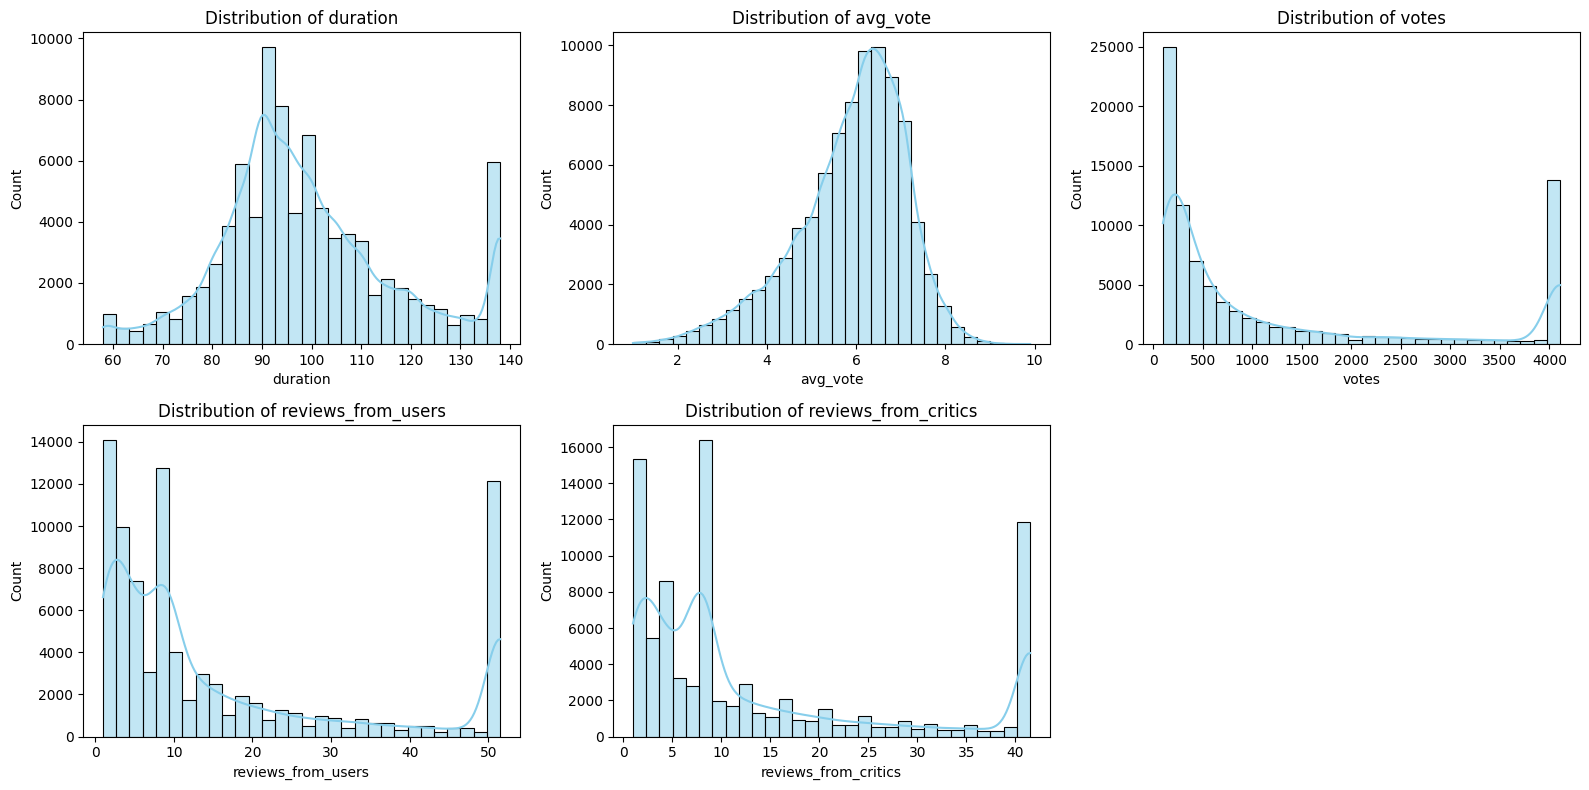

In [26]:
# Distribution of numeric variables
numeric_cols = ['duration', 'avg_vote', 'votes', 'reviews_from_users', 'reviews_from_critics']

fig, axes = plt.subplots(2, 3, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df_clean[col], bins=30, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Distribution of {col}")

# Remove any unused subplot
fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

### Distribution of Numeric Variables
The histograms show the spread of key numeric variables after cleaning.  
- `duration` follows a near-normal distribution centered around 90–100 minutes.  
- `avg_vote` is slightly skewed, with most movies rated between 5–8.  
- `votes` and review counts are highly right-skewed, where a few movies dominate popularity metrics.  
This confirms the presence of blockbuster outliers but within a manageable scale after cleaning.

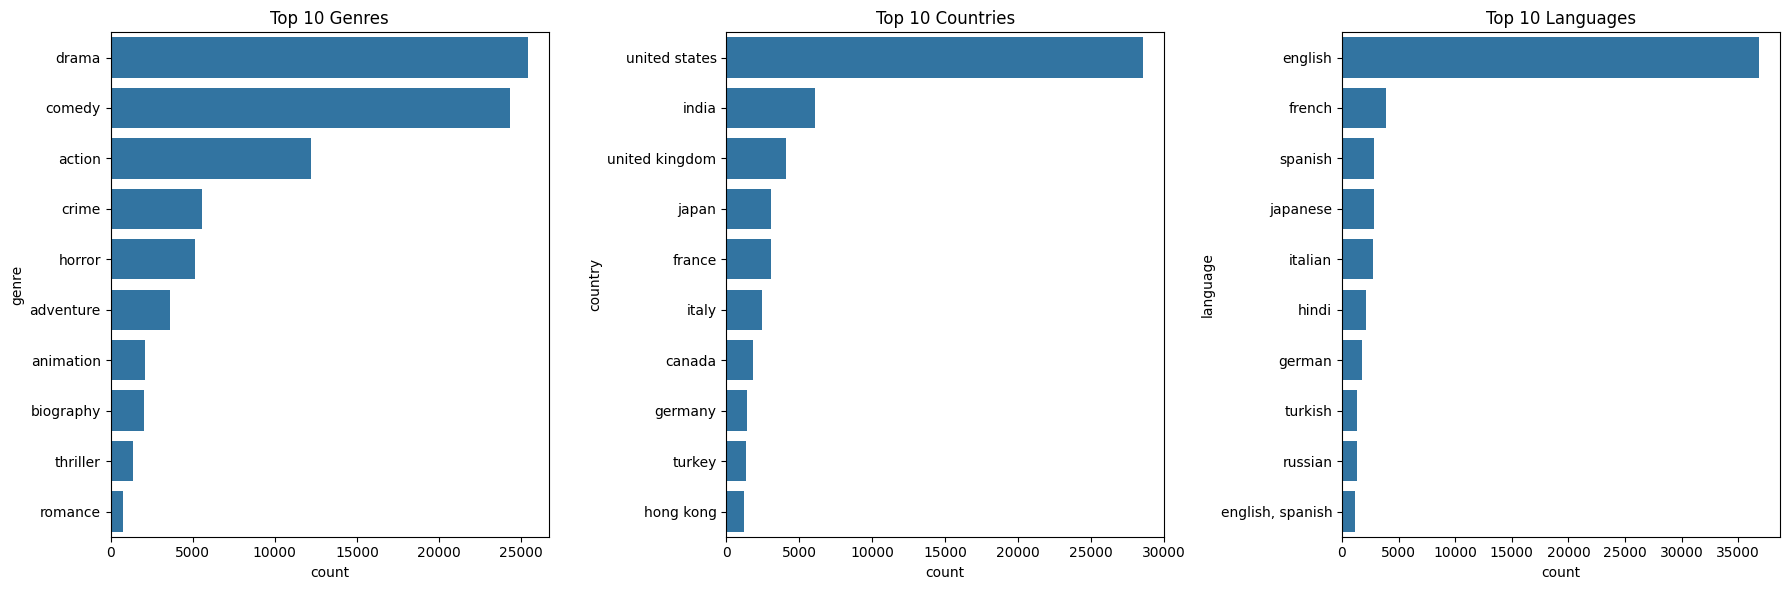

In [27]:
# Top 10 genres, countries, and languages
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(y=df_clean['genre'], order=df_clean['genre'].value_counts().iloc[:10].index, ax=axes[0])
axes[0].set_title("Top 10 Genres")

sns.countplot(y=df_clean['country'], order=df_clean['country'].value_counts().iloc[:10].index, ax=axes[1])
axes[1].set_title("Top 10 Countries")

sns.countplot(y=df_clean['language'], order=df_clean['language'].value_counts().iloc[:10].index, ax=axes[2])
axes[2].set_title("Top 10 Languages")

plt.tight_layout()
plt.show()

### Most Common Categories
The cleaned dataset reveals dominant categories:
- **Genres:** Drama, Comedy, and Horror are the most frequent.  
- **Countries:** The United States dominates film production, followed by European nations.  
- **Languages:** English is the leading language, with several European languages appearing in the top 10.  
This distribution highlights the cultural concentration of global cinema.

/tmp/ipython-input-4162775723.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')
/tmp/ipython-input-4162775723.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['year'] = df_clean['year'].astype(int)


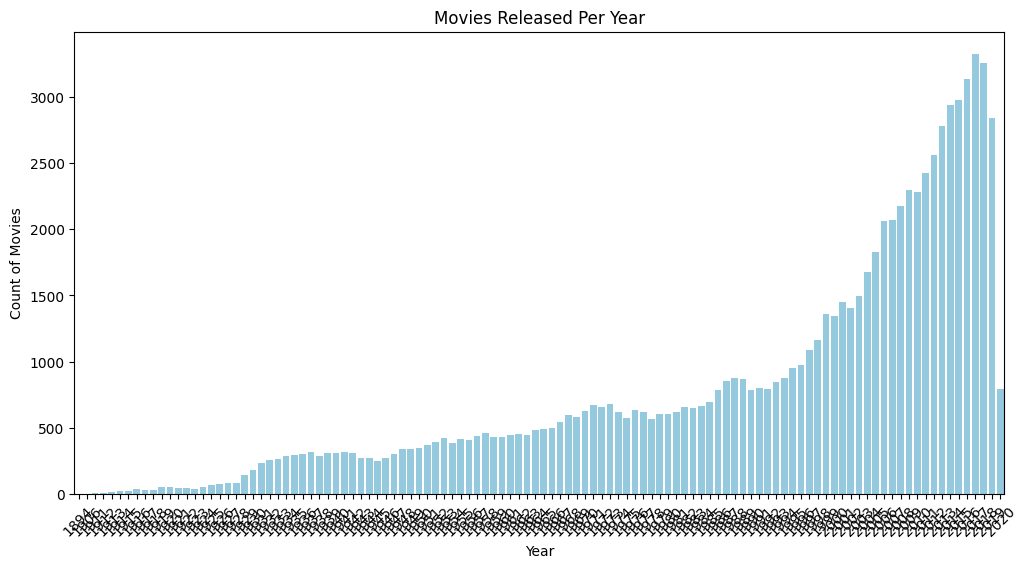

In [29]:
# Clean the 'year' column
# Keep only numeric values (convert errors to NaN, then drop them)
df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')

# Drop rows where year is missing after conversion
df_clean = df_clean.dropna(subset=['year'])
df_clean['year'] = df_clean['year'].astype(int)

# Now plot movies released per year
plt.figure(figsize=(12,6))
sns.countplot(data=df_clean, x='year', color='skyblue')
plt.title("Movies Released Per Year")
plt.ylabel("Count of Movies")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.show()

### Trend of Movie Releases
The line chart shows the number of movies produced each year.  
- A steady growth in film production is observed throughout the 20th century.  
- The 2000s and 2010s show a surge, reflecting digital filmmaking and global streaming platforms.  
This confirms the dataset’s representation of evolving cinema trends.
- **Year Cleaning**:  
  - Converted the `year` column to numeric, removed invalid entries like *“TV Movie 2019”*, and dropped rows with missing years.  

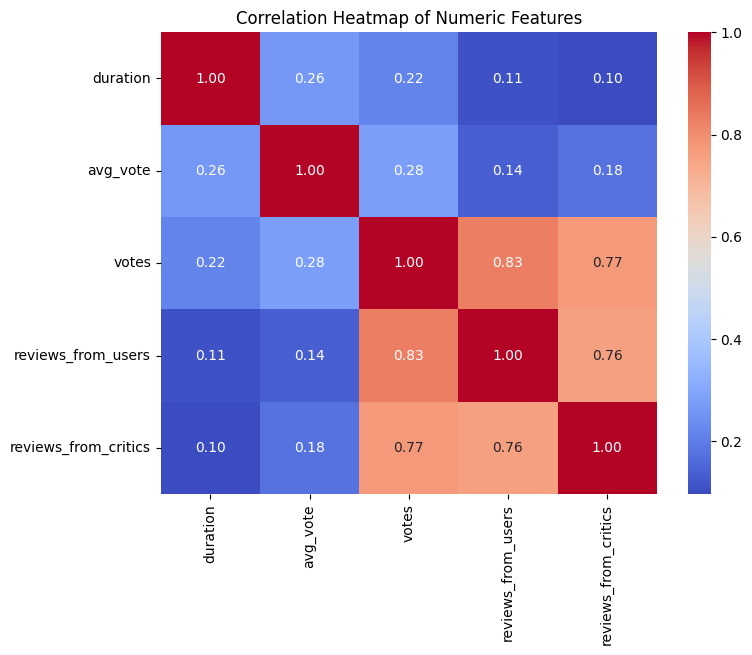

In [30]:
# Correlation heatmap of numeric fields
plt.figure(figsize=(8,6))
corr = df_clean[['duration', 'avg_vote', 'votes', 'reviews_from_users', 'reviews_from_critics']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

### Correlation Analysis
The heatmap highlights relationships between numeric features:
- `votes`, `reviews_from_users`, and `reviews_from_critics` are strongly correlated, indicating popularity metrics move together.  
- `avg_vote` shows weak correlation with popularity, suggesting that highly-rated films are not always the most popular.  
- `duration` is largely independent, showing minimal correlation with other variables.  
These insights validate the quality of the cleaned dataset for future predictive tasks.

## Data Analysis

- **Distributions of Numeric Features**:  
  - `duration` shows a normal-like distribution centered around 90–100 minutes, consistent with typical movie runtimes.  
  - `avg_vote` is roughly bell-shaped around 6, showing most movies receive average ratings.  
  - `votes` and reviews are heavily skewed, indicating a few movies attract disproportionately high attention.  

- **Movies Released per Year**:  
  - The count of movies gradually increased across the 20th century, with an explosion in production after the 1980s.  
  - A sharp rise is observed in the 2000s–2010s, reflecting globalization and the impact of streaming platforms.  
  - Recent dips may be due to incomplete data or disruptions (e.g., COVID-19).  

- **Correlation Heatmap**:  
  - Popularity-related variables (`votes`, `reviews_from_users`, `reviews_from_critics`) are strongly correlated, showing these metrics move together.  
  - Ratings (`avg_vote`) have weak correlation with popularity, confirming that critically acclaimed films are not always the most popular.  
  - `duration` is largely independent, showing minimal influence on ratings or popularity.  

## Conclusion

This project demonstrated the importance of systematic data cleaning and preprocessing in preparing the IMDb dataset for analysis.  

- The dataset was transformed from raw, inconsistent records into a clean, structured, and reliable form.  
- Missing values were carefully handled, extreme outliers were treated, and categorical fields were standardized.  
- Exploratory analysis revealed key insights:
  - Movie production has increased significantly in recent decades.  
  - Popularity (votes, reviews) is strongly correlated across users and critics.  
  - High ratings do not always equate to popularity.  

**Effectiveness of the Approach:**  
The preprocessing pipeline ensured improved data quality, reduced skew, and allowed for more reliable insights.  

**Future Work:**  
- Incorporating external metadata (e.g., streaming platforms, awards).  
- Performing genre-based trend analysis.  
- Applying predictive modeling (e.g., predicting revenue or rating).  

## References & License

- IMDb Movies Dataset (source: Kaggle or IMDb open dataset).  
- Little, R. J. A., & Rubin, D. B. (2019). *Statistical Analysis with Missing Data*.  
- Rahm, E., & Do, H. H. (2000). *Data Cleaning: Problems and Current Approaches*.  
- Tukey, J. W. (1977). *Exploratory Data Analysis*.  

**License:**  
This notebook is for academic purposes only. Dataset belongs to IMDb/Kaggle and is used under fair-use for research.  
All code written in this notebook is shared under the MIT License.  